In [43]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cv2

In [44]:
# !ls
print(os.path)

<module 'ntpath' from 'C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python37\\lib\\ntpath.py'>


In [45]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [46]:
print(np.shape(y_train), np.shape(x_train))
print(np.shape(y_test), np.shape(x_test))

(60000,) (60000, 28, 28)
(10000,) (10000, 28, 28)


In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [48]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.1576516 , -0.0393099 , -0.8593516 ,  0.18789424, -1.1004158 ,
        -0.50504106, -0.28299966,  0.21568729,  0.3329381 ,  0.05602729]],
      dtype=float32)

In [49]:
tf.nn.softmax(predictions).numpy()

array([[0.09674472, 0.10889862, 0.0479604 , 0.13667715, 0.03768686,
        0.06835306, 0.0853472 , 0.14052911, 0.15801112, 0.11979172]],
      dtype=float32)

In [50]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [51]:
loss_fn(y_train[:1], predictions).numpy()

2.683069

In [52]:
model.compile(optimizer='adam', loss=loss_fn, metrics='accuracy')

In [53]:
model.fit(x_train, y_train, batch_size=128, epochs=10, steps_per_epoch=400, validation_data=(x_test, y_test), validation_steps = 50)

Epoch 1/10
400/400 [==============================] - 2s 6ms/step - loss: 0.4279 - accuracy: 0.8763 - val_loss: 0.2419 - val_accuracy: 0.9284
Epoch 2/10
400/400 [==============================] - 2s 4ms/step - loss: 0.2032 - accuracy: 0.9407 - val_loss: 0.1780 - val_accuracy: 0.9475
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 0.1589 - accuracy: 0.9544 - val_loss: 0.1491 - val_accuracy: 0.9553
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 0.1317 - accuracy: 0.9616 - val_loss: 0.1260 - val_accuracy: 0.9606
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1061 - accuracy: 0.9678 - val_loss: 0.1136 - val_accuracy: 0.9669
Epoch 6/10
400/400 [==============================] - 2s 5ms/step - loss: 0.0990 - accuracy: 0.9706 - val_loss: 0.1043 - val_accuracy: 0.9680
Epoch 7/10
400/400 [==============================] - 1s 4ms/step - loss: 0.0872 - accuracy: 0.9745 - val_loss: 0.0967 - val_accuracy: 0.9680
Epoch 

In [54]:
model.save("mnist_model")
reconstructed_model = tf.keras.models.load_model("mnist_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mnist_model\assets


In [55]:
probability_model = tf.keras.Sequential([
    reconstructed_model,
    tf.keras.layers.Softmax()
])

In [56]:
print(probability_model(x_test[:5]))
y_test[:5]

tf.Tensor(
[[1.5702137e-06 1.9722501e-08 8.7383760e-06 4.2862725e-04 3.2250352e-10
  4.6646801e-07 5.8700836e-13 9.9955851e-01 1.5310972e-07 1.9358013e-06]
 [1.6999863e-07 5.4699576e-05 9.9983537e-01 3.8406156e-06 3.8204323e-12
  1.7456003e-06 6.1814887e-08 8.2561155e-14 1.0404616e-04 3.0743401e-11]
 [1.6154428e-06 9.9573839e-01 3.6145834e-04 2.5575113e-05 1.7945762e-04
  2.8372935e-05 2.4375600e-04 2.5855568e-03 8.2881661e-04 6.9626890e-06]
 [9.9998343e-01 8.5225271e-10 1.5067391e-06 1.7620094e-07 3.2103679e-07
  2.2228082e-06 8.3924151e-06 2.3989724e-06 4.4094719e-09 1.5372000e-06]
 [2.5202075e-05 2.7317459e-09 3.2467215e-05 1.3688964e-07 9.9667311e-01
  5.4248767e-07 4.6864275e-06 8.1479317e-05 2.4261446e-06 3.1799446e-03]], shape=(5, 10), dtype=float32)


array([7, 2, 1, 0, 4], dtype=uint8)

In [59]:
pred = reconstructed_model.predict(x_test[:5], 1)
print(pred)

[[-1.8950460e+00 -6.2722516e+00 -1.7853215e-01  3.7143307e+00
  -1.0385654e+01 -3.1088226e+00 -1.6694485e+01  1.1468809e+01
  -4.2228589e+00 -1.6857368e+00]
 [-3.4314773e+00  2.3423455e+00  1.2155832e+01 -3.1387919e-01
  -1.4134661e+01 -1.1024133e+00 -4.4431238e+00 -1.7969238e+01
   2.9853222e+00 -1.2049348e+01]
 [-7.3709388e+00  5.9606910e+00 -1.9604001e+00 -4.6089268e+00
  -2.6606076e+00 -4.5051112e+00 -2.3543799e+00  7.1479082e-03
  -1.1305487e+00 -5.9099822e+00]
 [ 1.1527518e+01 -9.3556061e+00 -1.8780299e+00 -4.0241079e+00
  -3.4241753e+00 -1.4892051e+00 -1.6064534e-01 -1.4129385e+00
  -7.7119780e+00 -1.8580148e+00]
 [-1.5808676e+00 -1.0710611e+01 -1.3275627e+00 -6.7963724e+00
   9.0043840e+00 -5.4193850e+00 -3.2631233e+00 -4.0744483e-01
  -3.9214921e+00  3.2568254e+00]]


[[-4.630323   -0.5928387  -4.3210125  -1.5689646  -4.9267473  -0.1682717
  -4.506528   -2.3990145   1.6107476   0.11865871]]
[[ -8.73737    -9.2631035   6.14385    16.965988  -15.022739    3.2284362
   -9.487958   -8.098329   -6.91148   -25.998148 ]]
[[-2.669088   -7.198226   -1.4302458  -1.8101549   7.022416    0.09887211
  -2.9928782  -6.173371   -6.654672    0.18095541]]
[[-10.678224   -3.590573    7.726697   12.512774  -23.475855    0.7394515
  -11.826978   -3.8071337   5.659564  -13.223183 ]]
[[  1.3434013 -14.580058  -11.343808   -5.5278087  -2.6626601   5.0470753
    2.555338   -6.8037696   0.8555809  -2.230796 ]]
[[ 14.6005335  -16.200294    -3.331913     2.957975    -9.746573
   -5.1137037   -0.04185989  -1.5908457  -13.684578   -11.649212  ]]
[[ -4.7132974  -9.109408   -2.7081637   9.269919  -19.75276     5.119491
   -8.794432  -13.828746   -2.3863485  -5.675383 ]]
[[-13.042536    4.2093425   4.541109    4.1292214 -11.339618   -3.746823
  -12.866967  -12.515799    5.7227616  

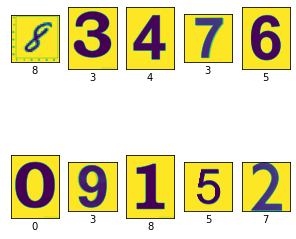

In [58]:
root = 'C:\\Users\\Admin\\Desktop\\WORK\\Deep Learning\\Deep-Learning\\MNIST\\dataset'
testing = []
i=1
plt.figure(figsize=(5,5))
for sample in os.listdir(root):
    img_path = root + '\\' + sample
    img = cv2.imread(img_path, 0)
    plt.subplot(2,5,i)
    i=i+1
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    img = cv2.resize(img, (28,28))
    img = (255-img)/255
    img = img.reshape(-1, 28, 28)
    # print(np.shape(image))
    pred = reconstructed_model.predict(img,1)
    print(pred)
    plt.xlabel(pred.argmax())